## Yelp Rating Predictor

Reviewing the JSON files relating to the businesses to determine and use a linear regression model to find projected ratings based on certain features

## Exploring the Datasets

In [1]:
import pandas as pd

In [2]:
# Adjusting columns and charaters to see the complete pictures of the dataframes
pd.options.display.max_columns = 60
pd.options.display.max_colwidth = 500

using the pd.read_json method to read data from the JSON files to convert into a DataFrame

In [3]:
business_df = pd.read_json('yelp_business.json', lines=True)
checkin_df = pd.read_json('yelp_checkin.json', lines=True)
photo_df = pd.read_json('yelp_photo.json', lines=True)
review_df = pd.read_json('yelp_review.json', lines=True)
tip_df = pd.read_json('yelp_tip.json', lines=True)
user_df = pd.read_json('yelp_user.json', lines=True)

Printing the Head of each data frame to get an idea with the data i'm working with

In [4]:
business_df.head(1)

,address,alcohol?,attributes,business_id,categories,city,good_for_kids,has_bike_parking,has_wifi,hours,is_open,latitude,longitude,name,neighborhood,postal_code,price_range,review_count,stars,state,take_reservations,takes_credit_cards
0,1314 44 Avenue NE,0,"{'BikeParking': 'False', 'BusinessAcceptsCreditCards': 'True', 'BusinessParking': '{'garage': False, 'street': True, 'validated': False, 'lot': False, 'valet': False}', 'GoodForKids': 'True', 'HasTV': 'True', 'NoiseLevel': 'average', 'OutdoorSeating': 'False', 'RestaurantsAttire': 'casual', 'RestaurantsDelivery': 'False', 'RestaurantsGoodForGroups': 'True', 'RestaurantsPriceRange2': '2', 'RestaurantsReservations': 'True', 'RestaurantsTakeOut': 'True'}",Apn5Q_b6Nz61Tq4XzPdf9A,"Tours, Breweries, Pizza, Restaurants, Food, Hotels & Travel",Calgary,1,0,0,"{'Monday': '8:30-17:0', 'Tuesday': '11:0-21:0', 'Wednesday': '11:0-21:0', 'Thursday': '11:0-21:0', 'Friday': '11:0-21:0', 'Saturday': '11:0-21:0'}",1,51.091813,-114.031675,Minhas Micro Brewery,,T2E 6L6,2,24,4.0,AB,1,1


In [5]:
checkin_df.head(2)

,business_id,time,weekday_checkins,weekend_checkins
0,7KPBkxAOEtb3QeIL9PEErg,"{'Fri-0': 2, 'Sat-0': 1, 'Sun-0': 1, 'Wed-0': 2, 'Fri-1': 1, 'Sat-1': 3, 'Thu-1': 1, 'Wed-1': 1, 'Sat-2': 1, 'Sun-2': 2, 'Thu-2': 1, 'Wed-2': 1, 'Fri-3': 1, 'Sun-3': 3, 'Mon-4': 1, 'Thu-4': 1, 'Tue-4': 2, 'Wed-4': 2, 'Sun-6': 1, 'Wed-6': 1, 'Thu-7': 1, 'Fri-10': 3, 'Mon-10': 1, 'Sat-10': 3, 'Sun-10': 3, 'Tue-10': 2, 'Mon-11': 1, 'Thu-11': 1, 'Wed-11': 2, 'Mon-12': 1, 'Sat-12': 1, 'Tue-12': 1, 'Sat-13': 3, 'Thu-13': 1, 'Tue-13': 2, 'Wed-13': 3, 'Fri-14': 2, 'Mon-14': 1, 'Sat-14': 1, 'Sun-14':...",76,75
1,kREVIrSBbtqBhIYkTccQUg,"{'Mon-13': 1, 'Thu-13': 1, 'Sat-16': 1, 'Wed-17': 1, 'Sun-19': 1, 'Thu-20': 1, 'Sat-21': 1}",4,3


In [6]:
photo_df.head(2)

,business_id,average_caption_length,number_pics
0,--1UhMGODdWsrMastO9DZw,0.0,1
1,--6MefnULPED_I942VcFNA,67.5,2


In [7]:
review_df.head(2)

,business_id,average_review_age,average_review_length,average_review_sentiment,number_funny_votes,number_cool_votes,number_useful_votes
0,--1UhMGODdWsrMastO9DZw,524.458333,466.208333,0.808638,1,16,15
1,--6MefnULPED_I942VcFNA,1199.589744,785.205128,0.669126,27,32,53


In [8]:
tip_df.head(2)

,business_id,average_tip_length,number_tips
0,--1UhMGODdWsrMastO9DZw,79.000000,1
1,--6MefnULPED_I942VcFNA,49.857143,14


In [9]:
user_df.head(2)

,business_id,average_number_friends,average_days_on_yelp,average_number_fans,average_review_count,average_number_years_elite
0,--1UhMGODdWsrMastO9DZw,18.791667,1789.750000,1.833333,57.541667,0.833333
1,--6MefnULPED_I942VcFNA,214.564103,2039.948718,49.256410,332.743590,1.769231


### Merging the datasets based on the Business ID as thats the linked column between all the data frames

In [10]:
'''Combining the dataframes in this order
df = business + checkin
df = df + photos
df = df + review
df = df + tip
df = df + user
'''

'Combining the dataframes in this order\ndf = business + checkin\ndf = df + photos\ndf = df + review\ndf = df + tip\ndf = df + user\n'

In [17]:
df = pd.merge(business_df, checkin_df, how='left', on='business_id')
df = pd.merge(df, photo_df, how='left', on='business_id')
df = pd.merge(df, review_df, how='left', on='business_id')
df = pd.merge(df, tip_df, how='left', on='business_id')
df = pd.merge(df, user_df, how='left', on='business_id')

In [18]:
df.head(2)

,address,alcohol?,attributes,business_id,categories,city,good_for_kids,has_bike_parking,has_wifi,hours,is_open,latitude,longitude,name,neighborhood,postal_code,price_range,review_count,stars,state,take_reservations,takes_credit_cards,time,weekday_checkins,weekend_checkins,average_caption_length,number_pics,average_review_age,average_review_length,average_review_sentiment,number_funny_votes,number_cool_votes,number_useful_votes,average_tip_length,number_tips,average_number_friends,average_days_on_yelp,average_number_fans,average_review_count,average_number_years_elite
0,1314 44 Avenue NE,0,"{'BikeParking': 'False', 'BusinessAcceptsCreditCards': 'True', 'BusinessParking': '{'garage': False, 'street': True, 'validated': False, 'lot': False, 'valet': False}', 'GoodForKids': 'True', 'HasTV': 'True', 'NoiseLevel': 'average', 'OutdoorSeating': 'False', 'RestaurantsAttire': 'casual', 'RestaurantsDelivery': 'False', 'RestaurantsGoodForGroups': 'True', 'RestaurantsPriceRange2': '2', 'RestaurantsReservations': 'True', 'RestaurantsTakeOut': 'True'}",Apn5Q_b6Nz61Tq4XzPdf9A,"Tours, Breweries, Pizza, Restaurants, Food, Hotels & Travel",Calgary,1,0,0,"{'Monday': '8:30-17:0', 'Tuesday': '11:0-21:0', 'Wednesday': '11:0-21:0', 'Thursday': '11:0-21:0', 'Friday': '11:0-21:0', 'Saturday': '11:0-21:0'}",1,51.091813,-114.031675,Minhas Micro Brewery,,T2E 6L6,2,24,4.0,AB,1,1,"{'Fri-0': 1, 'Sun-0': 3, 'Thu-0': 1, 'Fri-1': 1, 'Fri-16': 1, 'Tue-17': 1, 'Sat-18': 1, 'Tue-18': 2, 'Wed-18': 1, 'Fri-19': 2, 'Thu-19': 2, 'Sat-20': 3, 'Thu-20': 1, 'Tue-20': 1, 'Sat-21': 2, 'Tue-21': 1, 'Fri-22': 1, 'Sat-22': 1, 'Thu-22': 1, 'Fri-23': 1, 'Sat-23': 1}",11.0,18.0,NaN,NaN,618.250000,532.916667,0.865342,6,5,13,38.0,6.0,42.833333,1809.375000,5.375000,114.875000,1.125000
1,,0,"{'Alcohol': 'none', 'BikeParking': 'False', 'BusinessAcceptsCreditCards': 'True', 'BusinessParking': '{'garage': False, 'street': True, 'validated': False, 'lot': True, 'valet': False}', 'Caters': 'True', 'DogsAllowed': 'True', 'DriveThru': 'False', 'GoodForKids': 'True', 'GoodForMeal': '{'dessert': False, 'latenight': False, 'lunch': False, 'dinner': False, 'breakfast': False, 'brunch': False}', 'HasTV': 'False', 'OutdoorSeating': 'True', 'RestaurantsAttire': 'casual', 'RestaurantsDelivery'...",AjEbIBw6ZFfln7ePHha9PA,"Chicken Wings, Burgers, Caterers, Street Vendors, Barbeque, Food Trucks, Food, Restaurants, Event Planning & Services",Henderson,1,0,0,"{'Friday': '17:0-23:0', 'Saturday': '17:0-23:0', 'Sunday': '17:0-23:0'}",0,35.960734,-114.939821,CK'S BBQ & Catering,,89002,2,3,4.5,NV,0,1,{'Sun-1': 1},0.0,1.0,29.0,1.0,371.666667,481.333333,0.975000,0,1,1,66.0,1.0,64.333333,970.333333,2.666667,19.666667,0.666667


### Prepare and Cleaning the Data

Items to review: - Consistent data formats - Handling missing values - remove irrelevant columns that will not be used for training the machine learning model

In [19]:
df.columns

Index(['address', 'alcohol?', 'attributes', 'business_id', 'categories',
       'city', 'good_for_kids', 'has_bike_parking', 'has_wifi', 'hours',
       'is_open', 'latitude', 'longitude', 'name', 'neighborhood',
       'postal_code', 'price_range', 'review_count', 'stars', 'state',
       'take_reservations', 'takes_credit_cards', 'time', 'weekday_checkins',
       'weekend_checkins', 'average_caption_length', 'number_pics',
       'average_review_age', 'average_review_length',
       'average_review_sentiment', 'number_funny_votes', 'number_cool_votes',
       'number_useful_votes', 'average_tip_length', 'number_tips',
       'average_number_friends', 'average_days_on_yelp', 'average_number_fans',
       'average_review_count', 'average_number_years_elite'],
      dtype='object')

In [56]:
# Columns to remove from the dataframe
columns_to_drop = ['address', 'attributes', 'business_id', 'latitude', 'longitude', 'postal_code',
                   'state', 'city', 'hours', 'time', 'is_open', 'name', 'neighborhood','categories']

In [57]:
clean_df = df.drop(columns_to_drop, axis= 1)

In [58]:
clean_df.head()

,alcohol?,good_for_kids,has_bike_parking,has_wifi,price_range,review_count,stars,take_reservations,takes_credit_cards,weekday_checkins,weekend_checkins,average_caption_length,number_pics,average_review_age,average_review_length,average_review_sentiment,number_funny_votes,number_cool_votes,number_useful_votes,average_tip_length,number_tips,average_number_friends,average_days_on_yelp,average_number_fans,average_review_count,average_number_years_elite
0,0,1,0,0,2,24,4.0,1,1,11.0,18.0,NaN,NaN,618.250000,532.916667,0.865342,6,5,13,38.0,6.0,42.833333,1809.375000,5.375000,114.875000,1.125000
1,0,1,0,0,2,3,4.5,0,1,0.0,1.0,29.0,1.0,371.666667,481.333333,0.975000,0,1,1,66.0,1.0,64.333333,970.333333,2.666667,19.666667,0.666667
2,1,1,1,1,2,5,4.0,1,0,2.0,5.0,NaN,NaN,1106.200000,252.000000,0.301240,0,2,1,32.0,1.0,4.200000,1499.600000,1.000000,24.600000,0.600000
3,0,0,0,0,0,8,1.5,0,0,1.0,0.0,NaN,NaN,398.500000,672.625000,-0.060500,1,0,3,NaN,NaN,12.500000,1626.500000,2.375000,68.000000,0.250000
4,0,0,0,0,0,4,2.0,0,1,2.0,0.0,NaN,NaN,1412.750000,1015.500000,0.372550,0,0,4,NaN,NaN,137.750000,2570.000000,26.750000,528.250000,4.250000


Checking data to see if we have missing values or NaNs. These will prevent the Linear Regression model from running correctly.
Use df.isna().any(). This will check all of our columns and return True if there are any mising values or NaNs. If False, there are no missing values

In [59]:
clean_df.isna().any()

alcohol?                      False
good_for_kids                 False
has_bike_parking              False
has_wifi                      False
price_range                   False
review_count                  False
stars                         False
take_reservations             False
takes_credit_cards            False
weekday_checkins               True
weekend_checkins               True
average_caption_length         True
number_pics                    True
average_review_age            False
average_review_length         False
average_review_sentiment      False
number_funny_votes            False
number_cool_votes             False
number_useful_votes           False
average_tip_length             True
number_tips                    True
average_number_friends        False
average_days_on_yelp          False
average_number_fans           False
average_review_count          False
average_number_years_elite    False
dtype: bool

We will need to replace all NaN's with 0's in the data set using
.fillna()

In [60]:
v2_clean_df = clean_df.fillna(
    {'categories': 0,
    'weekday_checkins': 0,
    'weekend_checkins': 0,
    'average_caption_length': 0,
    'number_pics' :0,
    'average_tip_length': 0,
    'number_tips': 0}
)
v2_clean_df.replace('', 0,  inplace=True)

In [61]:
# Check to see if Na's were filled with zero's all columns should return False
v2_clean_df.isna().any()

alcohol?                      False
good_for_kids                 False
has_bike_parking              False
has_wifi                      False
price_range                   False
review_count                  False
stars                         False
take_reservations             False
takes_credit_cards            False
weekday_checkins              False
weekend_checkins              False
average_caption_length        False
number_pics                   False
average_review_age            False
average_review_length         False
average_review_sentiment      False
number_funny_votes            False
number_cool_votes             False
number_useful_votes           False
average_tip_length            False
number_tips                   False
average_number_friends        False
average_days_on_yelp          False
average_number_fans           False
average_review_count          False
average_number_years_elite    False
dtype: bool

# Exploratory Analysis
## Correlation analysis and feature selection
Investigating what features in the dataset could be correlated to the target variable (intercept).
For the Yelp review data, the target variable is 'stars'
The features with the best correlations could prove to be the most helpful for our Linear Regression model.
Correlation reminders:<br>
A coeff = 0 means two features have no linear relationship <br>
A coeff = 1 means two features have a perfect positive linear relationship <br>
A coeff = -1 means thw two features have a perfect negative linear relationship 

In [62]:
# Pandas has a method that can be called to see the correlation coefficients for each pair of our different features

v2_clean_df.corr()

,alcohol?,good_for_kids,has_bike_parking,has_wifi,price_range,review_count,stars,take_reservations,takes_credit_cards,weekday_checkins,weekend_checkins,average_caption_length,number_pics,average_review_age,average_review_length,average_review_sentiment,number_funny_votes,number_cool_votes,number_useful_votes,average_tip_length,number_tips,average_number_friends,average_days_on_yelp,average_number_fans,average_review_count,average_number_years_elite
alcohol?,1.000000,0.305284,0.213318,0.345032,0.349004,0.259836,-0.043332,0.601670,0.190738,0.094398,0.131175,0.305570,0.252523,0.139108,0.037369,0.097188,0.117472,0.188598,0.165775,0.098037,0.208856,0.015261,0.129901,0.017794,0.026846,0.099141
good_for_kids,0.305284,1.000000,0.271788,0.258887,0.205513,0.162469,-0.030382,0.318729,0.150360,0.068960,0.079808,0.291413,0.175058,0.055847,-0.079183,0.073806,0.060658,0.113262,0.083832,0.121948,0.156536,0.016557,0.045057,0.024901,0.040692,0.094233
has_bike_parking,0.213318,0.271788,1.000000,0.235138,0.416044,0.155505,0.068084,0.160129,0.286298,0.082474,0.093579,0.180468,0.109552,-0.080443,-0.116295,0.130448,0.060595,0.114094,0.094000,0.144163,0.147115,0.028307,-0.045849,0.018120,0.031203,0.083062
has_wifi,0.345032,0.258887,0.235138,1.000000,0.240796,0.195737,-0.039857,0.312217,0.155098,0.107467,0.126861,0.258938,0.210583,-0.034258,-0.037712,0.054699,0.082213,0.147320,0.120622,0.104742,0.173542,0.015937,0.000448,0.023913,0.044006,0.082863
price_range,0.349004,0.205513,0.416044,0.240796,1.000000,0.148277,-0.052565,0.316105,0.400742,0.057877,0.081321,0.170171,0.143570,0.189623,0.003850,0.089349,0.073215,0.119422,0.098990,0.129212,0.119632,0.087231,0.176133,0.104221,0.122982,0.210487
review_count,0.259836,0.162469,0.155505,0.195737,0.148277,1.000000,0.032413,0.187755,0.119984,0.567452,0.699631,0.224983,0.610889,0.010070,0.004748,0.076265,0.548164,0.860767,0.746949,0.094133,0.844978,0.026206,0.050451,0.000474,-0.002576,0.014712
stars,-0.043332,-0.030382,0.068084,-0.039857,-0.052565,0.032413,1.000000,-0.024486,0.037748,0.004130,0.007863,0.000040,0.001727,-0.125645,-0.277081,0.782187,0.001320,0.043375,-0.000066,-0.052899,0.014038,-0.007629,-0.038061,-0.031141,-0.066572,-0.064419
take_reservations,0.601670,0.318729,0.160129,0.312217,0.316105,0.187755,-0.024486,1.000000,0.127941,0.053162,0.076183,0.282823,0.231242,0.064098,0.046331,0.086728,0.071131,0.129165,0.115583,0.084098,0.134832,-0.025522,0.048850,0.001131,0.010618,0.063990
takes_credit_cards,0.190738,0.150360,0.286298,0.155098,0.400742,0.119984,0.037748,0.127941,1.000000,0.047402,0.055898,0.103271,0.073276,0.056399,-0.081383,0.084171,0.049945,0.079879,0.077804,0.119925,0.097700,0.027924,0.078443,-0.007124,-0.005260,0.009551
weekday_checkins,0.094398,0.068960,0.082474,0.107467,0.057877,0.567452,0.004130,0.053162,0.047402,1.000000,0.947118,0.088600,0.262576,0.030324,0.000789,0.025967,0.360497,0.560654,0.450894,0.039370,0.802160,0.053568,0.052168,0.029287,0.029392,0.045112


## Strong correlations
avg review age = -.125 <br>
avg review length = -0.278 <br>
avg review sentiment = 0.78

In [63]:
from matplotlib import pyplot as plt

Text(0.5, 0, 'Review Sentiment')

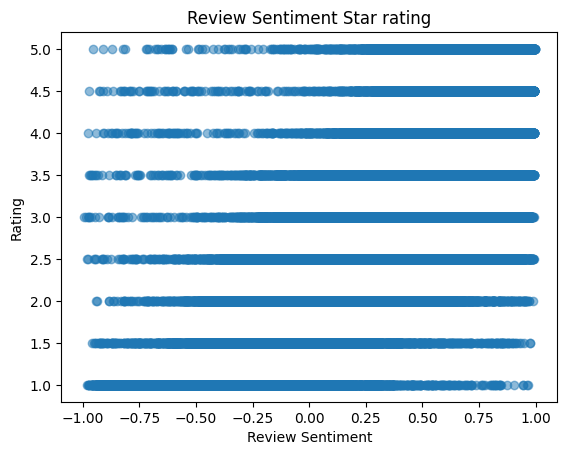

In [69]:
plt.scatter(v2_clean_df['average_review_sentiment'], df['stars'], alpha=0.5)
plt.title('Review Sentiment Star rating')
plt.ylabel('Rating')
plt.xlabel('Review Sentiment')

Text(0.5, 0, 'Review Length')

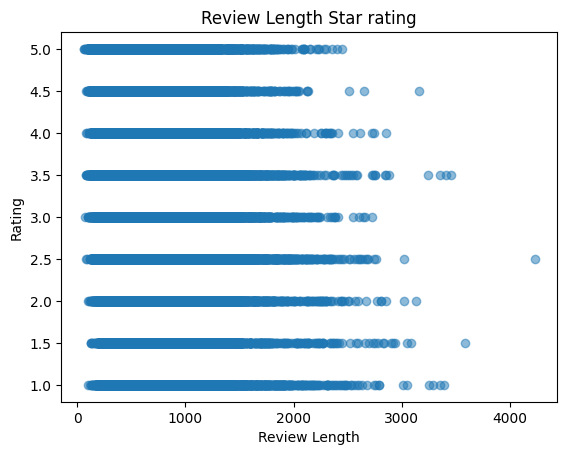

In [70]:
plt.scatter(v2_clean_df['average_review_length'], df['stars'], alpha=0.5)
plt.title('Review Length Star rating')
plt.ylabel('Rating')
plt.xlabel('Review Length')

Text(0.5, 0, 'Review Age')

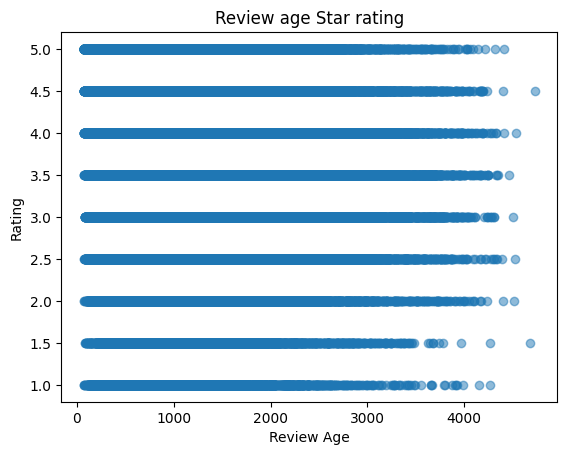

In [71]:
plt.scatter(v2_clean_df['average_review_age'], df['stars'], alpha=0.5)
plt.title('Review age Star rating')
plt.ylabel('Rating')
plt.xlabel('Review Age')

## Data Selection

Focusing on the 3 highest correlated features and place them into there own data frame for the data selection<br>
Also we will put stars as the dependent variable we are calculating against

In [72]:
# First we will review the length and age review features
features = df[['average_review_length', 'average_review_age']]
ratings = df['stars']

## Split data into Training and Testing Sets

Utilizing scikit-learn's train_test_split funtion to do the split. This functiuon takes 2 required parameters: our features followed by our dependent variable. Setting the test_size = 0.2 and the random_state to 1. <br>
<br>
The function returns 4 items<br>
X_train = training data based upon Features <br>
X_test = testing data based upon Features <br>
y_train = training data based upon the dependent variable <br>
y_test = testing data based upon the dependent variable <br>

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
X_train, X_test, y_train, y_test = train_test_split(features, ratings, test_size=0.2, random_state=1)

## Create and Train the Model

Data is now split into a training set at 80% and testing set at 20%<br>
Lets create the model and train!<br>
1. import LinearRegression from scikitlearn's linear_model module
2. create a new LinearRegression object named model
3. use .fit() method to fit the linear regression model with our TRAINING DATA

In [75]:
from sklearn.linear_model import LinearRegression

In [77]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Evaluate/Understand the Model
1. Use the .score() method to show the R^2 value for the model. R^2 is the coeff determineation<br>
    R^2 range from 0 to 1. 1 indicating the model fits perfectly with the features data.
2. Use .score() on our model using the X_train and y_train as parameters to calculate the R^2 score.
3. then use .score() using the X_test and y_test as parameters 

In [79]:
model.score(X_train, y_train)

0.08250309566544889

In [80]:
model.score(X_test, y_test)

0.08083081210060561

After all that hard work, we can finally take a look at the coefficients on our different features! The model has an attribute `.coef_` which is an array of the feature coefficients determined by fitting our model to the training data. To make it easier for you to see which feature corresponds to which coefficient, we have provided some code in the cell that `zip`s together a list of our features with the coefficients and sorts them in descending order from most predictive to least predictive.

In [81]:
sorted(list(zip(['average_review_length','average_review_age'],model.coef_)),key = lambda x: abs(x[1]),reverse=True)

[('average_review_length', -0.0009977176852074558),
 ('average_review_age', -0.00011621626836366481)]

Predict the yelp ratings for our test data and compare them to their actual yelp ratings.
1. Use the .predict() method which uses the models coeff' to calc the predicted yelp rating
2. call .predict() on X_test and asssingn the values to y_predicted.
3. plt y_test vs y_predicted.

In [82]:
y_predicted = model.predict(X_test)

(1.0, 5.0)

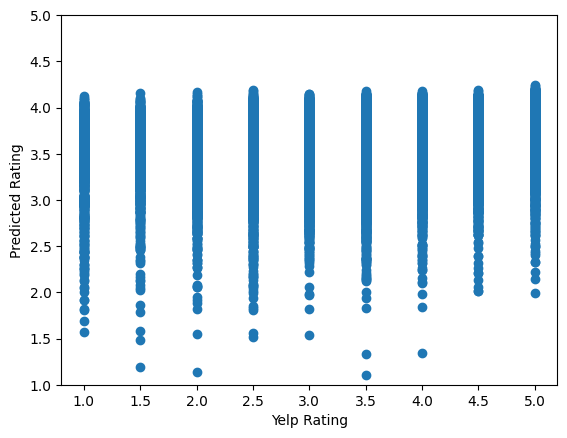

In [84]:
plt.scatter(y_test, y_predicted)
plt.xlabel('Yelp Rating')
plt.ylabel('Predicted Rating')
plt.ylim(1,5)

## Defining different subsets of data

Finding the best predictors of the yelp rating